# 一、不相关维度降维(unrelated dimension reduction)

我们在机器学习中经常会遇到特别高纬度的数据，很自然的想法是能否将这些数据投影到一个更低维度的子空间上去，却不损失掉原数据的主要信息。
PCA实现了一种线性变换，能够将高位数据投影到低维空间上去，并且在新的空间上各个维度不相关。

## 1.原数据点在新的空间上的坐标
我们将原数据点投影到新空间中每一个主成分上去，在每个主成分上的坐标被称作PC Score 

<img src='image1.png'>

因此原数据点在新空间中的坐标表示为：

<img src='image2.png'>

## 2.选取主成分
我们的目标是降维，因此我们只用选择一部分主成分即可：

<img src='image3.png'>

## 3.用主成分重构原数据点

虽然我们已经把原数据点投影到新空间上去了，我们在写代码的过程中，需要反过来将原数据点用新空间表示：

$$
y=A_p^T(x-\bar{x})\\
\Rightarrow\\
A_py=A_pA_p^T(x-\bar{x})\\
\Rightarrow\\
A_py=x-\bar{x}\\
\Rightarrow\\
\tilde{x}=\bar{x}+A_py
$$

所以有：

<img src='image4.png'>

# 二、应该选取多少个主成分？

在上面我们展示了使用三个主成分来表示原数据，但是和原数据之间还有一定差距，那么究竟应该选择多少个主成分为宜呢？
我们在PCA的上一篇博客中已经证明了：

>对于这样一个特征值问题
> $$\Sigma \mathbf{e}=\lambda \mathbf{e}, \vert \mathbf{e} \vert=1$$
> 第i个主成分向量就是第i大特征值所对应的特征向量
>
> $\lambda_i$:第i个主成分的离散程度
>
> $\mathbf{e}_i$:第i大主成分向量

那么我们的原始数据用新空间来表示之后，数据的总离散程度为：

$$\lambda_1+\lambda_2+\lambda_3+...+\lambda_d$$

我们选择前p个主成分，那么将原始数据表示为这些主成分的线性组合之后的离散程度为：
$$\lambda_1+\lambda_2+\lambda_3+...+\lambda_p$$

那么我们的目标是选择合适的p，使得数据的离散程度占原离散程度的比例达到一定值即可。
<img src='image5.png'>

## 三、用python实现PCA的降维

我们在这里还是使用elements of statistical learning 中的zipcode 数据集，在这本书的官网data分页中可以下载

In [43]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [44]:
data=np.loadtxt('./zip.train')

#我们用数字4来展示PCA的主成分
digit_4=data[data[:,0]==4]

#剔除target variable

#target_4=digit_4[:,0]
data_4=digit_4[:,1:]

In [45]:
#计算原数据的均值

mean=np.mean(data_4,axis=0)
#计算协方差矩阵
cov=np.cov(data_4,rowvar=False)

#计算协方差矩阵的特征值和特征向量
evals, evecs = np.linalg.eigh(cov)

#得到特征值排序的索引
idx=np.argsort(evals)

#得到特征值降序排序的索引
idx=idx[::-1]

#将特征向量和特征值按照上述索引进行排列
evecs = evecs[:,idx]

evals = evals[idx]

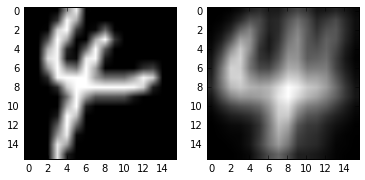

In [46]:
#我们任选一个数据点来看一下原数据是如何可以用各个主成分来表示，以data_4中第10个数据为例

x=data_4[10,:]

#计算x在新空间上的坐标

y=np.dot(evecs.T,x-mean)

#将原数据表示成前三个主成分
x_new=mean+y[0]*evecs[:,0]+y[1]*evecs[:,1]+y[2]*evecs[:,2]


fig=plt.figure()

#绘制原数据
plt.subplot(1,2,1)
plt.imshow(x.reshape(16,16),cmap='gray')


#绘制主成分的线性组合
plt.subplot(1,2,2)
plt.imshow(x_new.reshape(16,16),cmap='gray')


index of 95% is:  71


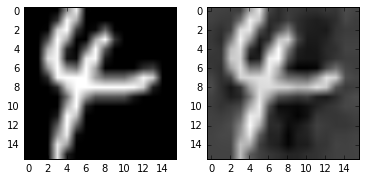

In [55]:
#我们来选择适当的p使得离散程度达到原来的95%

evals_percent=np.cumsum(evals)/np.sum(evals)

index=np.searchsorted(evals_percent,0.95)

x_new=mean

print 'index of 95% is: ',index
for i in xrange(index):
    x_new+=y[i]*evecs[:,i]

fig=plt.figure()

#绘制原数据
plt.subplot(1,2,1)
plt.imshow(x.reshape(16,16),cmap='gray')

#绘制主成分的线性组合
plt.subplot(1,2,2)
plt.imshow(x_new.reshape(16,16),cmap='gray')   